# 说明
分水岭算法是基于绝对灰度的，对于这种图像没有丝毫用处

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [33]:
def show(title, img):
    plt.plot(1, 1, 1)
    plt.title(title)
    plt.imshow(img, cmap="gray")
    plt.show()


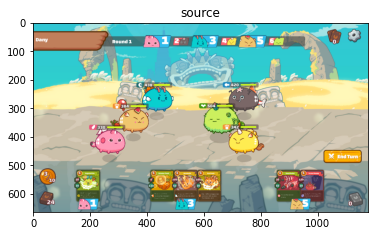

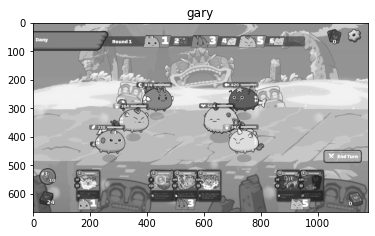

In [35]:
img_battle = cv2.cvtColor(cv2.imread("axie_some/images/20211025-160926.png"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_battle, cv2.COLOR_RGB2GRAY)

show("source", img_battle)
show("gary", gray)

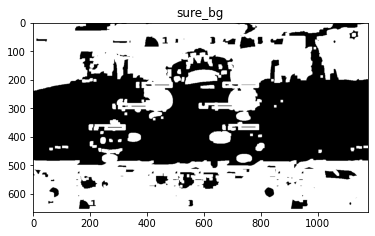

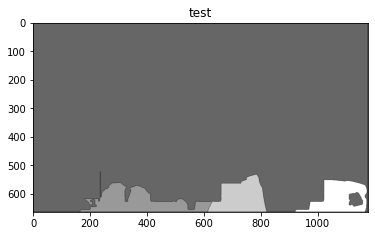

In [41]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# show("binary_inv", thresh)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
show("sure_bg", sure_bg)
# Finding sure foreground area
# 􏲧离变换的基本含义是􏰢算一个图像中􏰣􏲼像素点到最􏰩的􏲼像素点的􏲧离􏰶也就是到􏲼像素点的最 # 个最常􏱽的􏲧离变换算法就是􏰊􏰺􏱣续的腐􏰞操作来实现􏰶腐􏰞操作的停止条件是所有前景像素􏰻􏱑 # 腐􏰞。􏰼样根据腐􏰞的先后􏱺序􏰶我们就得到各个前景像素点到前景中心􏳩􏳪像素点的
# 􏲧离。根据各个像素点的􏲧离值􏰶􏱅置为不同的灰度值。􏰼样就完成了二值图像的􏲧离变换 #cv2.distanceTransform(src, distanceType, maskSize)
# 第二个参数 0,1,2 分别􏱜示 CV_DIST_L1, CV_DIST_L2 , CV_DIST_C
dist_transform = cv2.distanceTransform(opening,1,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


# Marker labelling
ret, markers1 = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers1+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0.7

markers3 = cv2.watershed(img_battle,markers)
img_battle[markers3 == -1] = [255,0,0]

show("test", markers3)